# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: Neeval Kumar
### Preferred Name (if different): 
### Student ID: 01187086
### Email address: kumar.neeval@gmail.com
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [66]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets  import load_digits
from sklearn.model_selection import cross_val_score

In [67]:
np.random.seed(42)

#### Code the solution

#### Load dataset and flatten

In [68]:
mnist = load_digits()
n_samples = len(mnist.images)
images = mnist.images.reshape((n_samples, -1))
labels = mnist.target
images = images.astype("float32")/255
labels

array([0, 1, 2, ..., 8, 9, 8])

#### Train split model and then train each model. Also print and store cross validation scores array and test set score

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=0, stratify = labels)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [70]:
model1 = MLPClassifier(random_state=1, max_iter=2000)
model1.fit(X_train, Y_train)

scores1 = cross_val_score(model1, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores1)
print('Mean Cross Validation Accuracy', np.mean(scores1))
model1_score = model1.score(X_test, Y_test)

Individual cross_validation accuracies: [0.93333333 0.87777778 0.95543175 0.9637883  0.90529248]
Mean Cross Validation Accuracy 0.9271247291860105


In [71]:
model2 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter= 2000,activation = 'relu',random_state=1)
model2.fit(X_train, Y_train)

scores2 = cross_val_score(model2, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores2)
print('Mean Cross Validation Accuracy', np.mean(scores2))
model2_score = model2.score(X_test, Y_test)

Individual cross_validation accuracies: [0.93055556 0.88888889 0.94150418 0.93036212 0.87743733]
Mean Cross Validation Accuracy 0.9137496131228723


In [72]:
model3 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=2000,activation = 'logistic',random_state=2)
model3.fit(X_train, Y_train)

scores3 = cross_val_score(model3, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores3)
print('Mean Cross Validation Accuracy', np.mean(scores3))
model3_score = model3.score(X_test, Y_test)

Individual cross_validation accuracies: [0.86111111 0.81666667 0.86908078 0.88857939 0.81058496]
Mean Cross Validation Accuracy 0.8492045806251933


In [73]:
model4 = MLPClassifier(hidden_layer_sizes=(64,32,16), max_iter=2000,activation = 'relu',random_state=1)
model4.fit(X_train, Y_train)

scores4 = cross_val_score(model4, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores4)
print('Mean Cross Validation Accuracy', np.mean(scores4))
model4_score = model4.score(X_test, Y_test)

Individual cross_validation accuracies: [0.91666667 0.87222222 0.91922006 0.92479109 0.8913649 ]
Mean Cross Validation Accuracy 0.9048529866914267


In [74]:
model5 = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=2000,activation = 'relu',random_state=1)
model5.fit(X_train, Y_train)

scores5 = cross_val_score(model5, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores5)
print('Mean Cross Validation Accuracy', np.mean(scores5))
model5_score = model5.score(X_test, Y_test)

Individual cross_validation accuracies: [0.925      0.83888889 0.91364903 0.91922006 0.87743733]
Mean Cross Validation Accuracy 0.894839059114825


In [75]:
model6 = MLPClassifier(hidden_layer_sizes=(120,64,16), max_iter=2000,activation = 'relu',random_state=1)
model6.fit(X_train, Y_train)

scores6 = cross_val_score(model6, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores6)
print('Mean Cross Validation Accuracy', np.mean(scores6))
model6_score = model5.score(X_test, Y_test)

Individual cross_validation accuracies: [0.9        0.85833333 0.93314763 0.93314763 0.85236769]
Mean Cross Validation Accuracy 0.8953992571959146


In [76]:
model7 = MLPClassifier(hidden_layer_sizes=(320,120,32), max_iter=2000,activation = 'relu',random_state=1)
model7.fit(X_train, Y_train)

scores7 = cross_val_score(model7, images, labels, cv= 5)
print('Individual cross_validation accuracies:', scores7)
print('Mean Cross Validation Accuracy', np.mean(scores7))
model7_score = model7.score(X_test, Y_test)


Individual cross_validation accuracies: [0.91944444 0.90277778 0.94428969 0.93036212 0.88857939]
Mean Cross Validation Accuracy 0.9170906839987619


#### Create a dataframe that stores the model name and cross-validation scores (makes it easier to plot)

In [77]:
model_scores = [model1_score, model2_score, model3_score, model4_score, model5_score, model6_score, model7_score]
cross_validation_scores = [scores1, scores2, scores3, scores4, scores5, scores6, scores7]


In [78]:
df = pd.DataFrame(columns = ['All Models', 'Scores'])

for i in range(len(cross_validation_scores)):
    model_name = "Model"+str(i+1)
    for y in cross_validation_scores[i]:
        new_row = {"All Models": model_name, "Scores": y}
        df = df.append(new_row, ignore_index=True)
    

#### Plot Violion plot

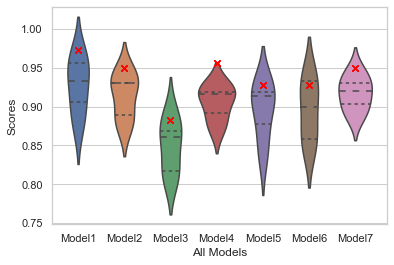

In [90]:


sns.violinplot(x='All Models', y = 'Scores', data = df, inner="quartile")
for i in range(7):
    plt.plot(model_scores, marker = 'x', linestyle = 'None', color = "red")
sns.set(style="whitegrid")
plt.show()
